<a href="https://colab.research.google.com/github/TheMonarch00/Movie-Reviews-Sentiment-Analysis/blob/main/Major_Project_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required modules

In [1]:
# For scientific computations
import numpy as np 
# Loading dataset file
import pandas as pd 
# To use Regular expression
import re  
# Visualization
import seaborn as sns

# Reading the datset
Displaying dataset dimensions, shape, content summary etc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
dataset = pd.read_table('/content/drive/MyDrive/Internship_ml/moviereviews.tsv')
print("Shape:",dataset.shape)  ### Return the shape of data 
print("Dimensions:",dataset.ndim)   ### Return the n dimensions of data
print("Size:",dataset.size)   ### Return the size of data 
print("Count of empty fields:\n",dataset.isna().sum())  ### Returns the sum fo all na values
print("Summary of dataset:")
print(dataset.info())  ### Give concise summary of a DataFrame
print("Top 5 reviews:\n",dataset.head())  ## top 5 rows of the dataframe
print("Last 5 reviews:\n",dataset.tail()) ## bottom 5 rows of the dataframe

Shape: (25000, 3)
Dimensions: 2
Size: 75000
Count of empty fields:
 id           0
sentiment    0
review       0
dtype: int64
Summary of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB
None
Top 5 reviews:
        id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
Last 5 reviews:
             id  sentiment    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


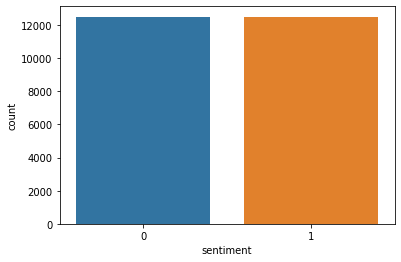

In [4]:
# Find if dataset is balanced or imbalanced (it is balanced)
sns.countplot('sentiment',data=dataset)

# Cleaning up the reviews


*   Using regular expressions to replace , by white spaces 
*   Tokenisation
*   Set stopwords and remove them from the review
*   Append unique words to corpus list

In [5]:
corpus = []
# We have 25000 reviews
for i in range(0,25000):   
     review = re.sub('[^a-zA-Z]'," ",dataset["review"][i])
     review = review.lower()
     review = review.split()
     # Stopwords are commonly occuring words with no effect on sentiment
     all_stopword = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
     # Keep only non-stop words
     review = [word for word in review if not word in set(all_stopword)]
     review = " ".join(review)
     corpus.append(review)

Count vectorization

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
# Max features (1500) columns are read
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = dataset["sentiment"]

# Creating a model
Split dataset into training and testing models

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Applying Gaussian and Multinomial Navie Bayes model to dataset

In [8]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
GNB = GaussianNB()
MNB = MultinomialNB()
model1 = GNB.fit(X_train, y_train)
model2 = MNB.fit(X_train, y_train)

Choosing model with better accuracy for prediction

In [9]:
print("Accuracy of Gaussian:",GNB.score(X_test,y_test))   ## 0.796
print("Accuracy of Multinomial:",MNB.score(X_test,y_test))   ## 0.8502

Accuracy of Gaussian: 0.796
Accuracy of Multinomial: 0.8502


# Predicting output

In [10]:
y_pred=model2.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

[[1 0]
 [0 1]
 [1 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


# Evaluating model metrics

In [11]:
# Evaluate based on accuracy, classification report and confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
cl_report = classification_report(y_test,y_pred)
print("Confusion matrix:\n",cm)
print("Classification Report:\n",cl_report)
print("Accuracy of MNB: ",score*100)

Confusion matrix:
 [[2151  397]
 [ 352 2100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      2548
           1       0.84      0.86      0.85      2452

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000

Accuracy of MNB:  85.02


Save model as pickle file

In [12]:
import pickle
# Save trained model and CountVectorizer to pickle
pickle.dump(cv, open('countvectorizer.pkl', 'wb'))
pickle.dump(model2, open("MNBmodel.pkl", "wb"))
# Open trained model and re-evaluate
loaded_model = pickle.load(open("MNBmodel.pkl", "rb"))
y_pred_new = loaded_model.predict(X_test)
print("Accuracy score: ",loaded_model.score(X_test,y_test))

Accuracy score:  0.8502


Predict output for user entered review

In [13]:
# Predict output for new review
def new_review(new_review):
  cv = pickle.load(open("countvectorizer.pkl","rb"))
  loaded_model = pickle.load(open("MNBmodel.pkl", "rb"))
  new_review = new_review
  # Replace , by white spaces in the input review
  new_review = re.sub('[^a-zA-Z]', ' ', new_review)
  # Convert to lower case
  new_review = new_review.lower()
  # Separate words from text in review
  new_review = new_review.split()
  # Generate stop words in english
  all_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
  # If word in review is not a stop word, add to corpus list
  new_review = [word for word in new_review if not word in set(all_stopwords)]
  new_review = ' '.join(new_review)
  new_corpus = [new_review]
  # Convert to binary form
  new_X_test = cv.transform(new_corpus).toarray()
  # Predict sentiment for review
  new_y_pred = loaded_model.predict(new_X_test)
  return new_y_pred

# User input
input_review = input('Enter new review:')
new_review = new_review(input_review)
# Display results to user
if new_review[0]==1:
   print("Positive")
else :
   print("Negative")


Enter new review:worth the money
Negative


# Deployment

In [14]:
!pip install streamlit
!pip install pyngrok==4.1.1
from pyngrok import ngrok

     |████████████████████████████████| 7.5MB 4.2MB/s 
     |████████████████████████████████| 163kB 34.8MB/s 
     |████████████████████████████████| 4.6MB 41.3MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 
     |████████████████████████████████| 112kB 48.8MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
     |████████████████████████████████| 122kB 50.8MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=9fb47e6e9855093d274328d3482d2eddee511dbe1f7a97e83773b4b4a03d3978
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.0 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp37-none-any.whl size=15971 sha256=14d9816194e8d13f3400cc913dd14b04cf017d4acbe4e3a23970ad96ca602e63
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [15]:
%%writefile app.py
# Import modules
import pandas as pd 
import pickle
import streamlit as st
import re

# Display on webpage
st.title('Movie review classification')
st.markdown("This project uses the IMDB movie review dataset")
st.markdown("Using sentiment analysis, reviews will be classified under a specific category")
st.sidebar.title("Steps for use: ")
st.sidebar.markdown("1. Write a review in the box")
st.sidebar.markdown("2. Press enter")
st.sidebar.markdown("3. Wait for Positive/Negative to appear")
st.sidebar.markdown("It's that simple!")

# Load previously created models
loaded_model = pickle.load(open("MNBmodel.pkl","rb"))
cv = pickle.load(open("countvectorizer.pkl","rb"))

# Predict output for new review
def new_review(new_review):
  new_review = new_review
  # Replace , by white spaces in the input review
  new_review = re.sub('[^a-zA-Z]', ' ', new_review)
  # Convert to lower case
  new_review = new_review.lower()
  # Separate words from text in review
  new_review = new_review.split()
  # Generate stop words in english
  all_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
  # If word in review is not a stop word, add to corpus list
  new_review = [word for word in new_review if not word in set(all_stopwords)]
  new_review = ' '.join(new_review)
  new_corpus = [new_review]
  # Convert to binary form
  new_X_test = cv.transform(new_corpus).toarray()
  # Predict sentiment for review
  new_y_pred = loaded_model.predict(new_X_test)
  return new_y_pred

# Take review from user
input_review = st.text_input('Enter new review:')
new_review = new_review(input_review)
# Display results to user
if new_review[0]==1:
   st.title("Positive")
else :
   st.title("Negative")

Writing app.py


In [16]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://abf7e3e0e5ea.ngrok.io'

Generate requirements.txt that contains a list of libraries needed to run this code

In [17]:
!pip freeze > requirements.txt